In [1]:
import math
import json
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import numpy as np


def distance(x1, x2, y1, y2, z1, z2, w1, w2):
    return math.sqrt(math.pow((x2-x1), 2)+math.pow((y2-y1), 2)+math.pow((z2-z1), 2)+math.pow((w2-w1), 2))


def jsontopython():
    reading = open("data.json", "r")
    jsonstring = reading.read()
    reading.close()
    data = json.loads(jsonstring)
    return data



In [2]:
data = jsontopython()
keys = data.keys()
dictmain = {}
dictmap = {}
for i in keys:
    keya = str(i)
    stringa = data[keya]
    dictab = {}
    listab = []
    for key in keys:
        if key != i:
            keyb = str(key)
            stringb = data[keyb]
            classb = stringb["class"]
            f1a = float(stringa["f1"].replace(',', '.'))
            f1b = float(stringb["f1"].replace(',', '.'))
            f2a = float(stringa["f2"].replace(',', '.'))
            f2b = float(stringb["f2"].replace(',', '.'))
            f3a = float(stringa["f3"].replace(',', '.'))
            f3b = float(stringb["f3"].replace(',', '.'))
            f4a = float(stringa["f4"].replace(',', '.'))
            f4b = float(stringb["f4"].replace(',', '.'))
            distanceab = distance(f1a, f1b, f2a, f2b, f3a, f3b, f4a, f4b)
            listab.append(distanceab)
            dictab[distanceab] = classb
    listab = sorted(listab)
    dictmap[i] = listab
    dictmain[i] = dictab

In [3]:
def errorfunction(j, aobject, aclass): 
    listmap = dictmap[aobject]
    objectdistances = dictmain[aobject]
    p = 0
    n = 0
    errk = 0
    i = 0
    while i<j:
        key = listmap[i]
        bclass = objectdistances[key]
        if bclass == aclass:
            p+=1
        else:
            n+=1
        i+=1
    if n == 0:
        errk = 0
    else:
        errk = p/n
    return errk

Введите номер объекта:
23
23
Введите класс объекта:
iris-virginica
iris-virginica
[0.         0.         0.         0.         0.         0.
 0.         7.         3.5        2.33333333 1.75       2.
 1.6        1.33333333 1.14285714 1.28571429 1.125      1.
 0.9        0.81818182 0.75       0.69230769 0.64285714 0.6
 0.5625     0.52941176 0.5        0.47368421 0.45      ]


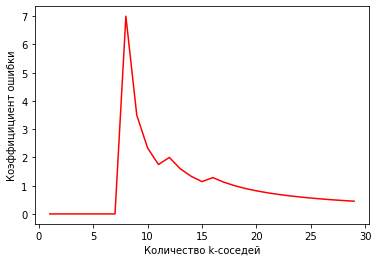

In [4]:
print('Введите номер объекта:')
aobject = input()
print('Введите класс объекта:')
aclass = input()

k = np.arange(1, 30, 1)

j = int(1)
yl = []
while j<30:
    yl.append(errorfunction(j, aobject, aclass))
    j+=1
    
y = np.array(yl)
print(y)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(k, y, color="red")
ax.set_xlabel(u'Количество k-соседей')
ax.set_ylabel(u'Коэффицициент ошибки')
plt.show()